## AutoEncoders on PointClouds - Modular Code

In [1]:
import sys
import time
import numpy as np
import os.path as osp
import tensorflow as tf
import matplotlib.pyplot as plt

from tensorflow.examples.tutorials.mnist import input_data
from general_tools.in_out import create_dir
from tf_lab.point_clouds.point_cloud_ae import FullyConnectedAutoEncoder
from tf_lab.point_clouds.point_cloud_ae import Configuration
import tf_lab.point_clouds.in_out as pio
from tf_lab.point_clouds.in_out import PointCloudDataSet

In [97]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [5]:
# mnist = input_data.read_data_sets('/Users/optas/DATA/Images/MNIST/', one_hot=True)

In [15]:
DATA_PATH = '/Users/optas/DATA/Point_Clouds/Shape_Net_Core/3000/no_segmentations/03001627/'
file_names = pio.load_filenames_of_input_data(DATA_PATH)
# file_names = file_names[:100]
all_pclouds = np.array(pio.load_crude_point_clouds(file_names=file_names)[0])

6778 files containing  point clouds were found.


In [101]:
from tf_lab.point_clouds.in_out import train_validate_test_split
train_data, val_data, test_data = train_validate_test_split(all_pclouds, train_perc=0.6, validate_perc=0.2,\
                                                            test_perc=0.2, seed=42)
train_data = PointCloudDataSet(train_data)
test_data = PointCloudDataSet(test_data)
val_data = PointCloudDataSet(val_data)

In [102]:
n_input = 3000 * 3
training_epochs = 100
basic_conf = Configuration(n_input, training_epochs)
basic_conf.encoder_sizes = [500, 300, 200]
basic_conf.decoder_sizes = [300, n_input]

fc_ae = FullyConnectedAutoEncoder('fc5', basic_conf)

In [103]:
def train(model, training_epochs, batch_size, loss_display_step=5, test=None):
    # Training cycle
    for epoch in range(training_epochs):
        
        cost, duration = single_epoch_train(model, batch_size)
        if epoch % loss_display_step == 0:
            print("Epoch:", '%04d' % (epoch+1), "cost=", "{:.9f}".format(cost))
            
        if test is not None:
            cost, duration = single_epoch_test(model, batch_size)
            print("TEST - Epoch:", '%04d' % (epoch+1), "cost=", "{:.9f}".format(cost))

        
def single_epoch_test(model, batch_size):
    n_examples = test_data.num_examples
    epoch_cost = 0.
    n_batches = int(n_examples / batch_size)
    start_time = time.time()

    # Loop over all batches
    for i in xrange(n_batches):
        batch_i, _ = test_data.next_batch(batch_size)
        # Fit training using batch data
        _, cost = model.reconstruct(batch_i)
        # Compute average loss
        epoch_cost += cost

    epoch_cost /= (n_batches * batch_size)
    duration = time.time() - start_time
    return epoch_cost, duration
    
def single_epoch_train(model, batch_size):
    n_examples = train_data.num_examples
    epoch_cost = 0.
    n_batches = int(n_examples / batch_size)
    start_time = time.time()

    # Loop over all batches
    for i in xrange(n_batches):
        batch_i, _ = train_data.next_batch(batch_size)
        # Fit training using batch data
        cost = model.partial_fit(batch_i)
        # Compute average loss
        epoch_cost += cost

    epoch_cost /= (n_batches * batch_size)
    duration = time.time() - start_time
    return epoch_cost, duration

In [105]:
train(fc_ae, batch_size=25, training_epochs=500)

('Epoch:', '0001', 'cost=', '0.000472292')
('Epoch:', '0006', 'cost=', '0.000468621')
('Epoch:', '0011', 'cost=', '0.000467078')
('Epoch:', '0016', 'cost=', '0.000468768')
('Epoch:', '0021', 'cost=', '0.000470832')
('Epoch:', '0026', 'cost=', '0.000464101')
('Epoch:', '0031', 'cost=', '0.000468030')
('Epoch:', '0036', 'cost=', '0.000470757')
('Epoch:', '0041', 'cost=', '0.000468449')
('Epoch:', '0046', 'cost=', '0.000467022')
('Epoch:', '0051', 'cost=', '0.000466811')
('Epoch:', '0056', 'cost=', '0.000464881')
('Epoch:', '0061', 'cost=', '0.000463213')
('Epoch:', '0066', 'cost=', '0.000469945')
('Epoch:', '0071', 'cost=', '0.000464107')
('Epoch:', '0076', 'cost=', '0.000464347')
('Epoch:', '0081', 'cost=', '0.000465479')
('Epoch:', '0086', 'cost=', '0.000464178')
('Epoch:', '0091', 'cost=', '0.000465042')
('Epoch:', '0096', 'cost=', '0.000467430')
('Epoch:', '0101', 'cost=', '0.000465033')
('Epoch:', '0106', 'cost=', '0.000462419')
('Epoch:', '0111', 'cost=', '0.000461894')
('Epoch:', 

In [106]:
from geo_tool import Point_Cloud
x_sample, _ = train_data.next_batch(10)
x_reconstruct, _ = fc_ae.reconstruct(x_sample)

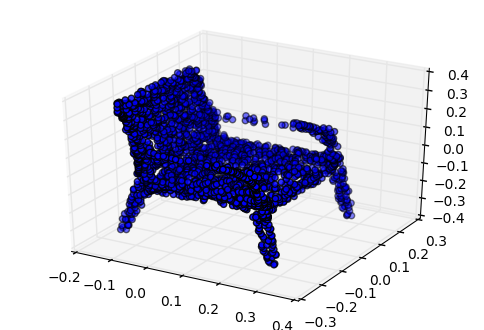

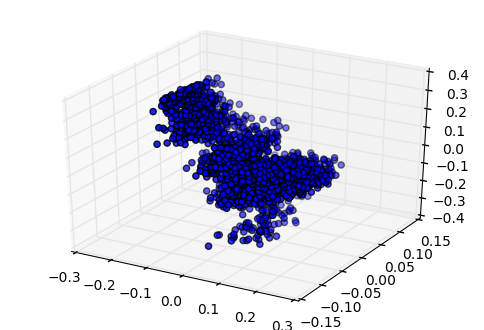

In [109]:
pclouds_samples = 3000
i = 3
Point_Cloud(points=x_sample[i].reshape(pclouds_samples, 3)).plot();
Point_Cloud(points=x_reconstruct[i].reshape(pclouds_samples, 3)).plot();

